In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(threshold=np.inf)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score


import scipy as sp
np.set_printoptions(threshold=np.inf)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
# # 读取数据
# dataset= pd.read_excel('data6041.xlsx', sheet_name='Sheet1')
# X = dataset.iloc[:, 1:4]
# y = dataset.iloc[:,4]




In [3]:
# #分测试集和训练集
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # 特征归一化
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)



In [4]:
# df=dataset.iloc[:,1:5]
# df_train,df_test=train_test_split(df,test_size = 0.2, random_state = 0)
# df_train.to_csv("d://xunlian.csv")
# df_test.to_csv("d://ceshi.csv")

In [2]:

print("开始读入训练数据...")
df = pd.read_excel('../data/train6041.xlsx', sheet_name='Sheet1')


esc = StandardScaler().fit(df['Fluid resistivity logging'].values.reshape(-1, 1))
fsc = StandardScaler().fit(df['natural gamma-ray logging'].values.reshape(-1, 1))
gsc = StandardScaler().fit(df['spontaneous potential logging'].values.reshape(-1, 1))




e = esc.transform(df['Fluid resistivity logging'].values.reshape(-1, 1))
f = fsc.transform(df['natural gamma-ray logging'].values.reshape(-1, 1))
g = gsc.transform(df['spontaneous potential logging'].values.reshape(-1, 1))



X_train = np.concatenate(( e,f,g), axis=1)
y_train = np.array(df['rock'])



开始读入训练数据...


In [3]:
#生成分类器并训练
from sklearn.ensemble import GradientBoostingClassifier

classifier= GradientBoostingClassifier( random_state=0)



In [7]:
# #应用k次交叉验证评价模型性能
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# accuracies.mean()
# #accuracies.std() 
# #这意味着我们的准确度在（90-100）%之间

In [8]:
#应用网格搜索寻找最佳模型和最佳参数
from sklearn.model_selection import GridSearchCV #对SVC进行检查，网格搜索优化参数。
parameters = [{'learning_rate' : [0.0001,0.001,0.01,0.1,0.5],'n_estimators' : [10,30,50,70,90],'min_samples_leaf':[10,20,30,40,50],'max_depth':[2,5,10,15,20,25,30]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [9]:
#将网格搜索对象拟合到训练集
# grid_search = grid_search.fit(X_train, y_train)

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


889.4144204


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [10]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数
best_parameters = grid_search.best_params_






In [11]:
print('%.5f' %best_accuracy)
print(best_parameters)


0.81409
{'learning_rate': 0.1, 'max_depth': 20, 'min_samples_leaf': 20, 'n_estimators': 30}


In [12]:
parameters = [{'learning_rate' : [0.02,0.05,0.1,0.3,0.5],'n_estimators' : [10,20,30,40,50],'min_samples_leaf':[10,15,20,25,30],'max_depth':[18,19,20,21,22]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [13]:
# grid_search = grid_search.fit(X_train, y_train)
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


644.0158361999997


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [14]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数
best_parameters = grid_search.best_params_

In [15]:
print('%.5f' %best_accuracy)
print(best_parameters)

0.81552
{'learning_rate': 0.1, 'max_depth': 18, 'min_samples_leaf': 20, 'n_estimators': 30}


In [16]:
parameters = [{'learning_rate' : [0.02,0.05,0.1,0.3,0.5],'n_estimators' : [30],'min_samples_leaf':[20],'max_depth':[18]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [17]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


6.650036


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [18]:
k1 = [0.02,0.05,0.1,0.3,0.5]
for x1 in k1:
    classifier= GradientBoostingClassifier(learning_rate=x1,n_estimators =30,min_samples_leaf=20,max_depth=18,random_state=0)
    classifier.fit(X_train, y_train,)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 )
   

    print('%.5f' % accuracies.mean())


0.80569
0.80901
0.81577
0.79418
0.78118


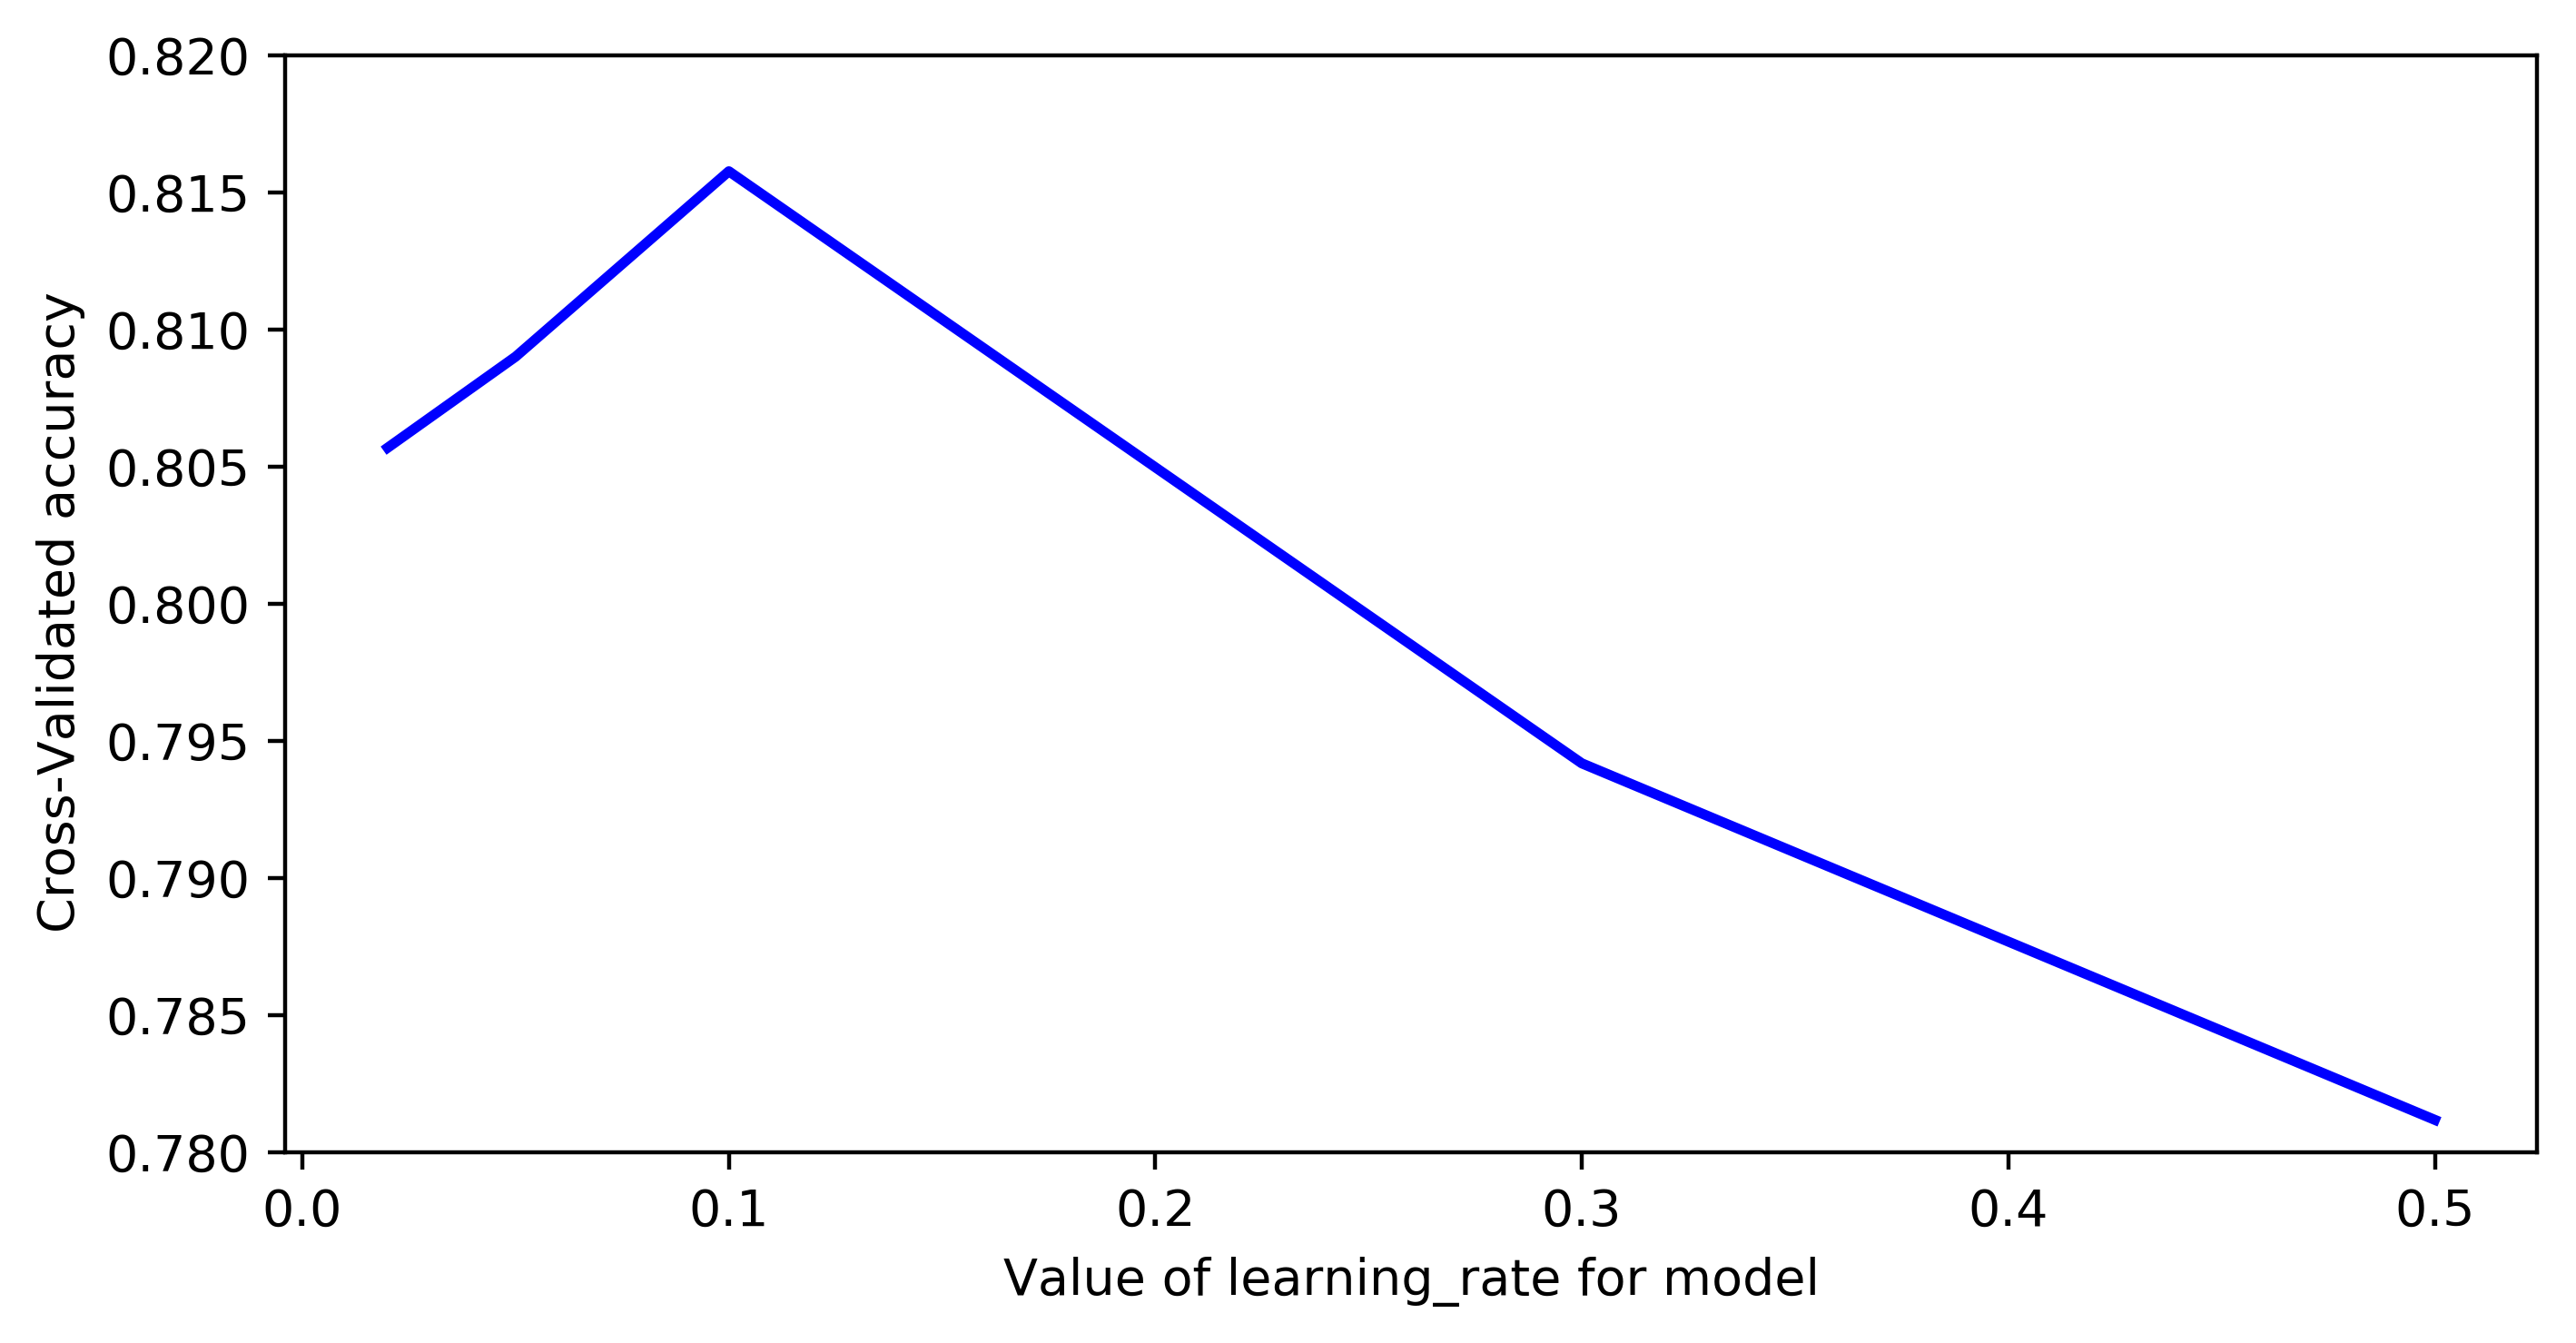

In [19]:
x = [0.02,0.05,0.1,0.3,0.5]
y=[0.80569,0.80901,0.81577,0.79418,0.78118]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of learning_rate for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.78,0.82)
plt.show
plt.savefig('../Data/GTB_accuracy_1.png', format='png')

In [20]:
parameters = [{'learning_rate' : [0.1],'n_estimators' : [10,20,30,40,50],'min_samples_leaf':[20],'max_depth':[18]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [21]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


7.369425200000478


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [22]:
k2 = [10,20,30,40,50]
for x2 in k2:
    classifier= GradientBoostingClassifier(learning_rate=0.1,n_estimators =x2,min_samples_leaf=20,max_depth=18,random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.80574
0.81336
0.81577
0.80760
0.79799


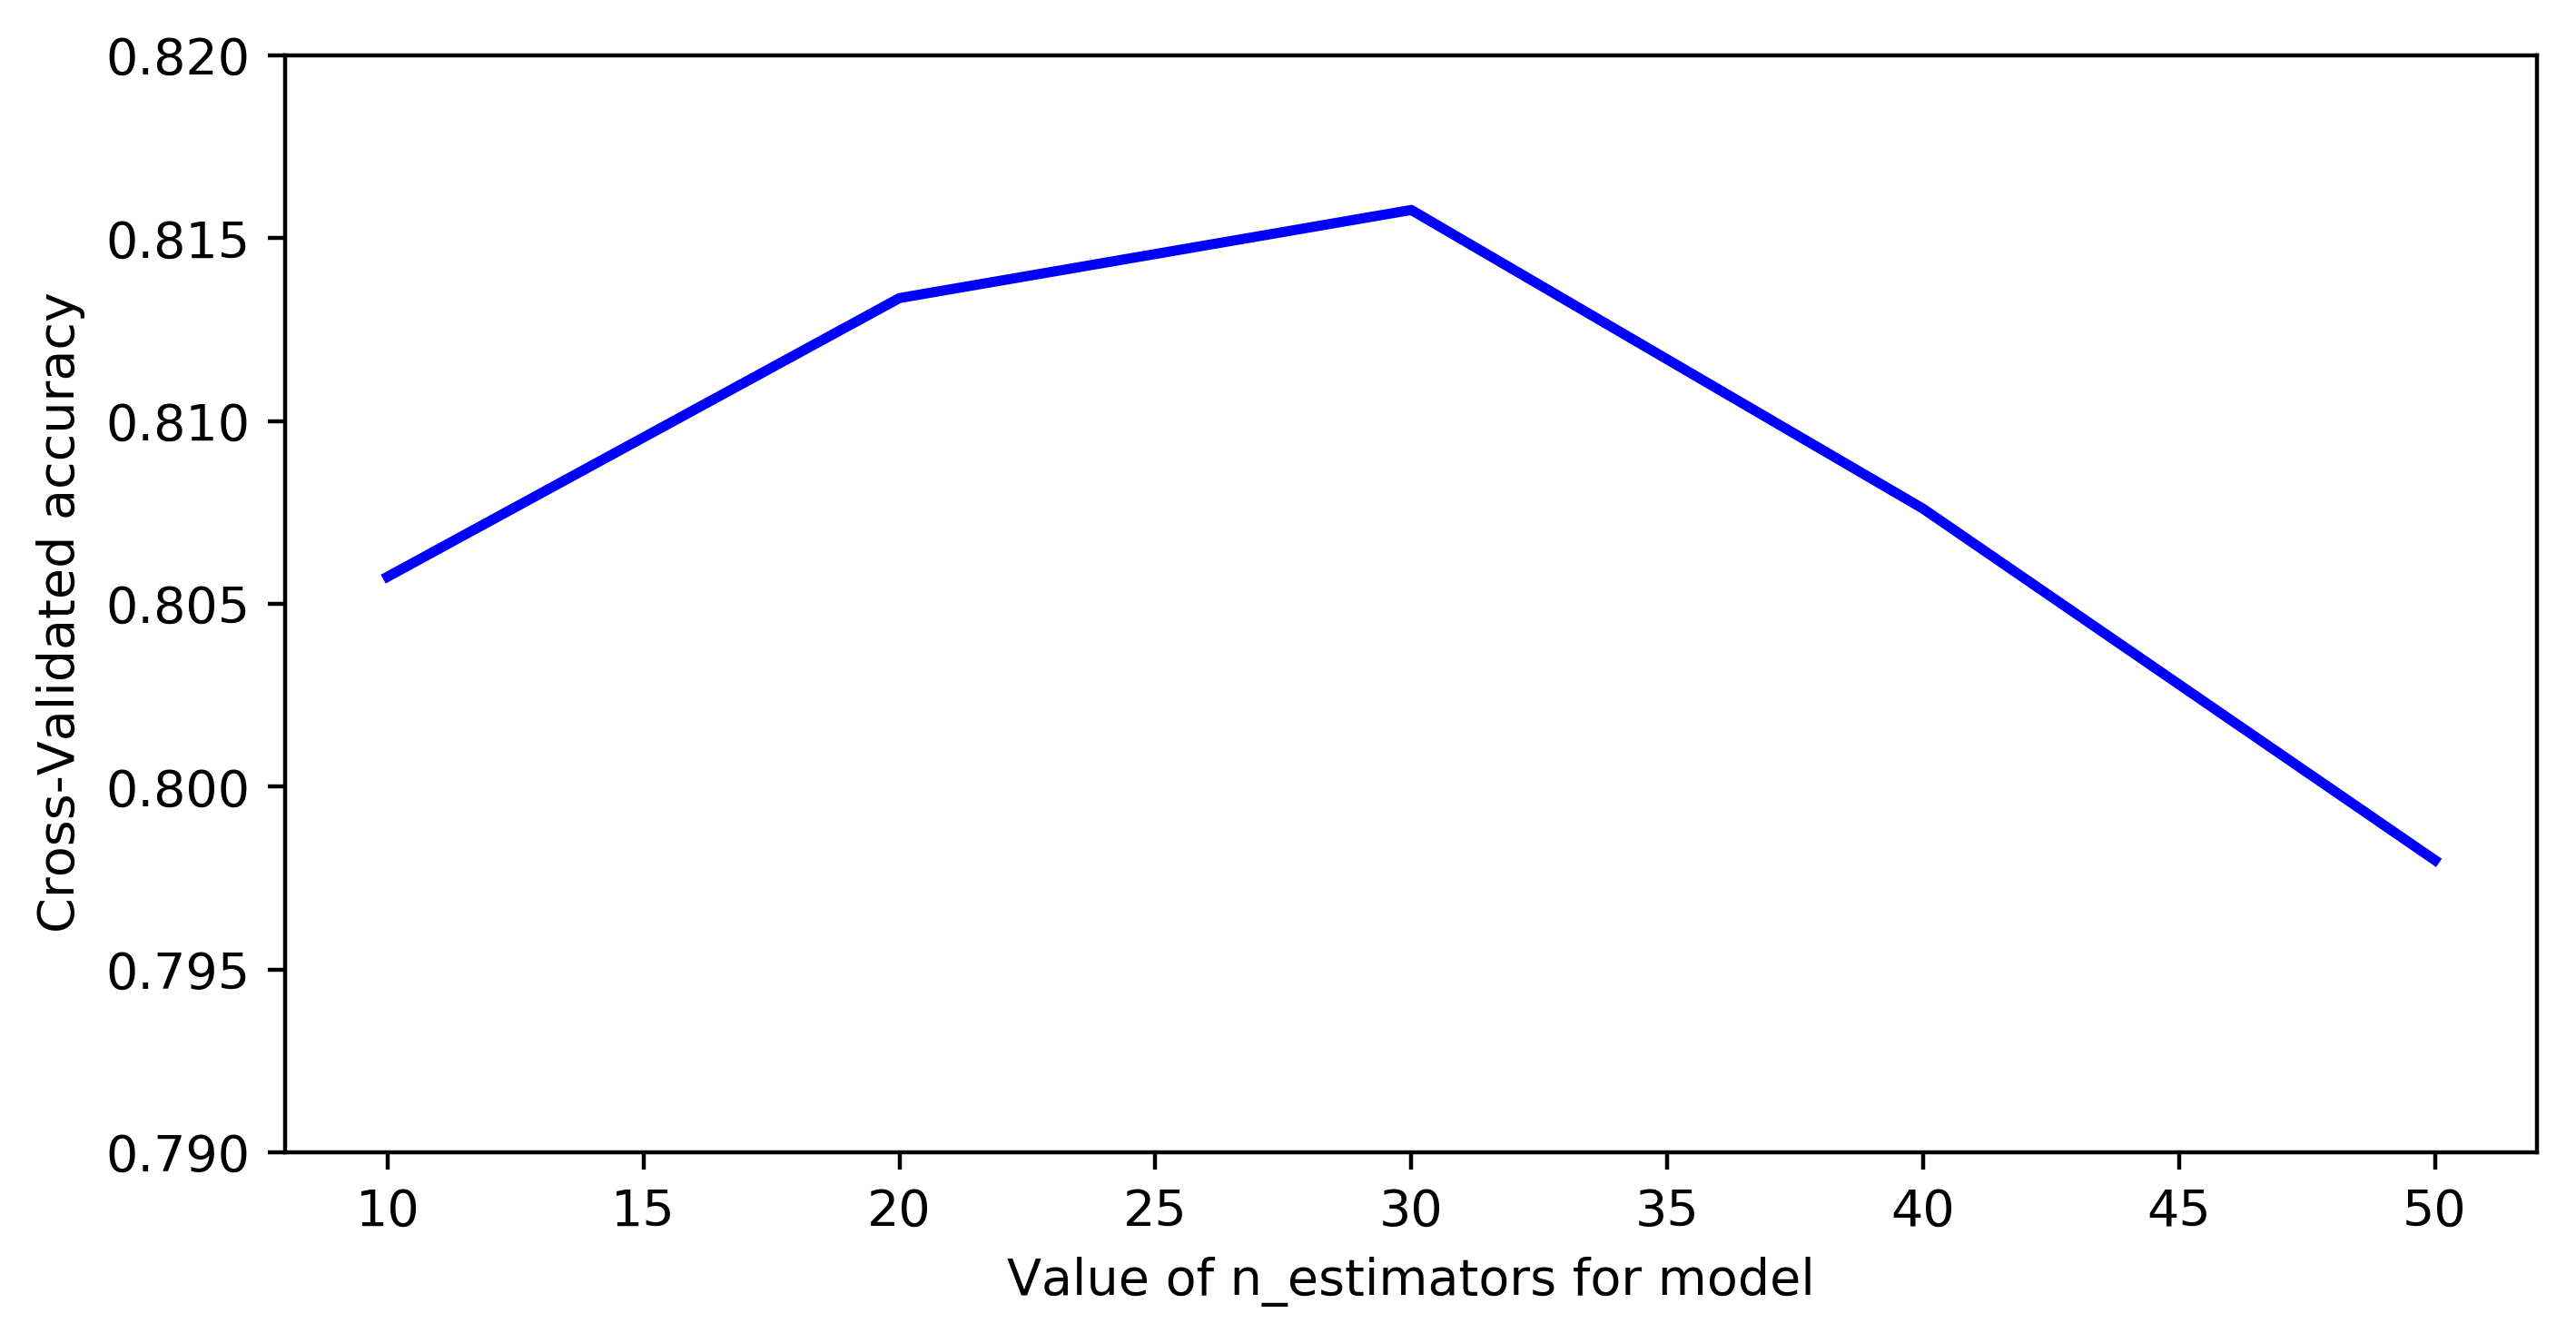

In [23]:
x = [10,20,30,40,50]
y=[0.80574,0.81336,0.81577,0.80760,0.79799]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of n_estimators for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.79,0.82)
plt.show
plt.savefig('../Data/GTB_accuracy_2.png', format='png')

In [24]:
parameters = [{'learning_rate' : [0.1],'n_estimators' : [30],'min_samples_leaf':[10,15,20,25,30],'max_depth':[18]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [25]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


7.645145200000115


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [26]:
k3 = [10,15,20,25,30]
for x3 in k3:
    classifier= GradientBoostingClassifier(learning_rate=0.1,n_estimators =30,min_samples_leaf=x3,max_depth=18,random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.79841
0.80754
0.81577
0.80520
0.80564


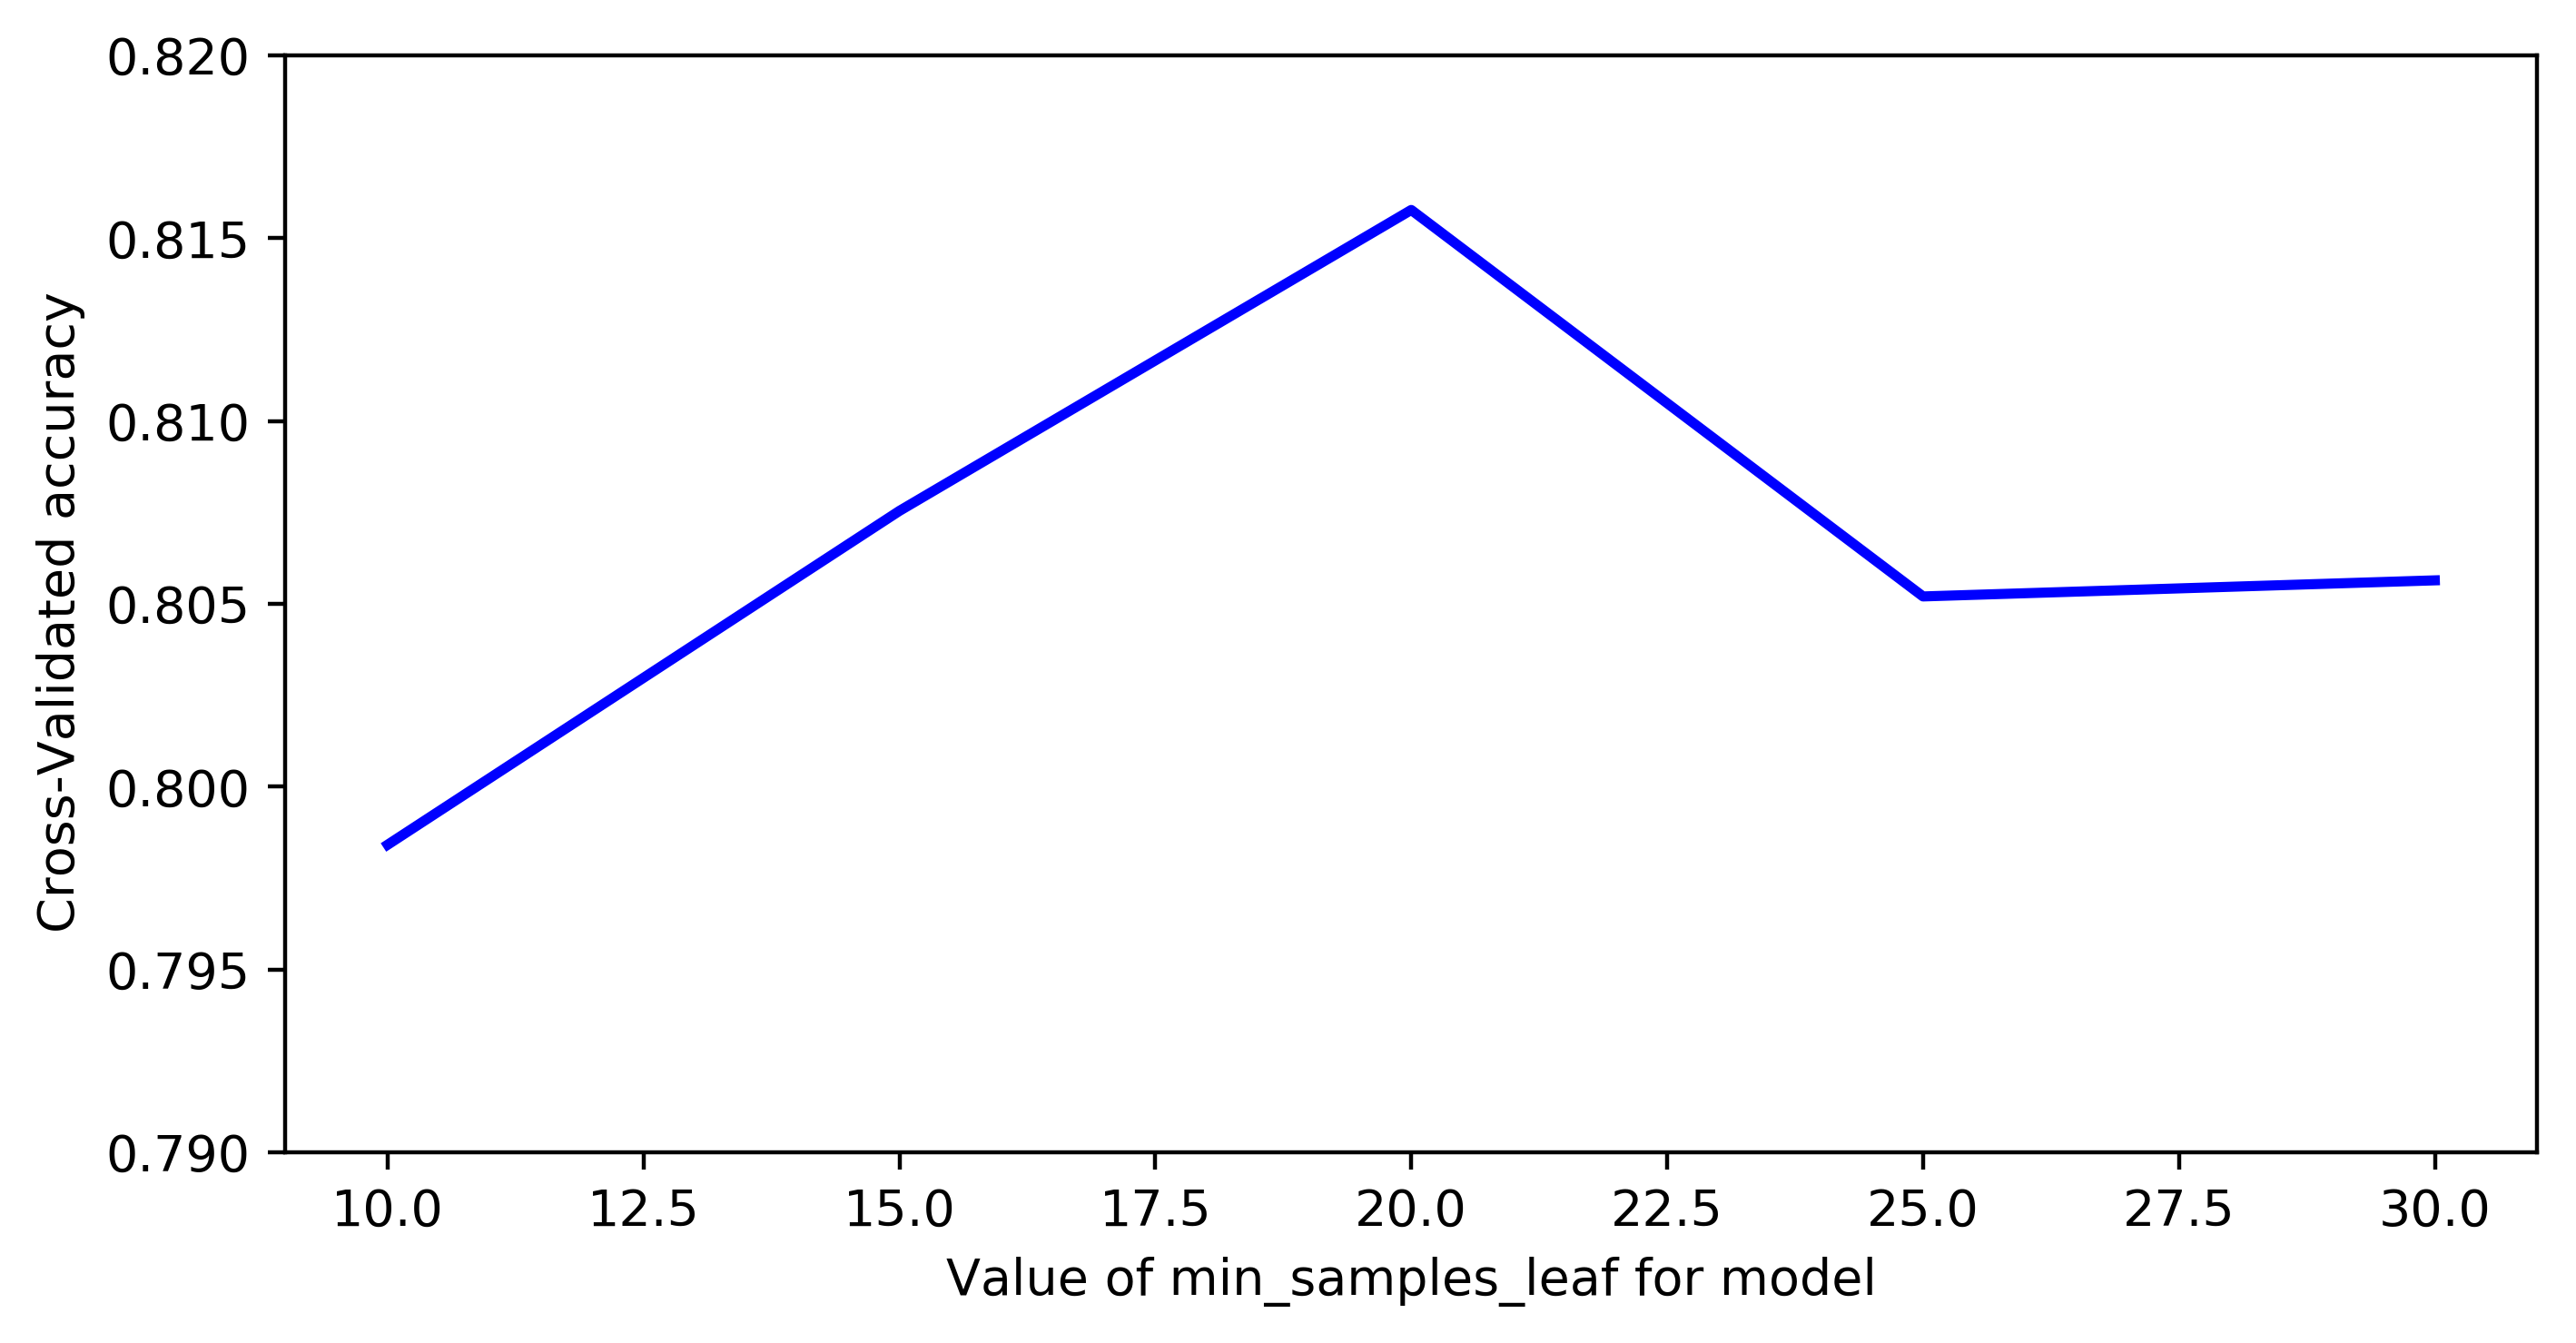

In [27]:
x =[10,15,20,25,30]
y=[0.79841,0.80754,0.81577,0.80520,0.80564]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of min_samples_leaf for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.79,0.82)
plt.show
plt.savefig('../Data/GTB_accuracy_3.png', format='png')

In [28]:
parameters = [{'learning_rate' : [0.1],'n_estimators' : [30],'min_samples_leaf':[20],'max_depth':[18,19,20,21,22]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [29]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


7.450783700000102


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [30]:
k4 = [18,19,20,21,22]
for x4 in k4:
    classifier= GradientBoostingClassifier(learning_rate=0.1,n_estimators =30,min_samples_leaf=20,max_depth=x4,random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.81577
0.81525
0.81427
0.81193
0.81284


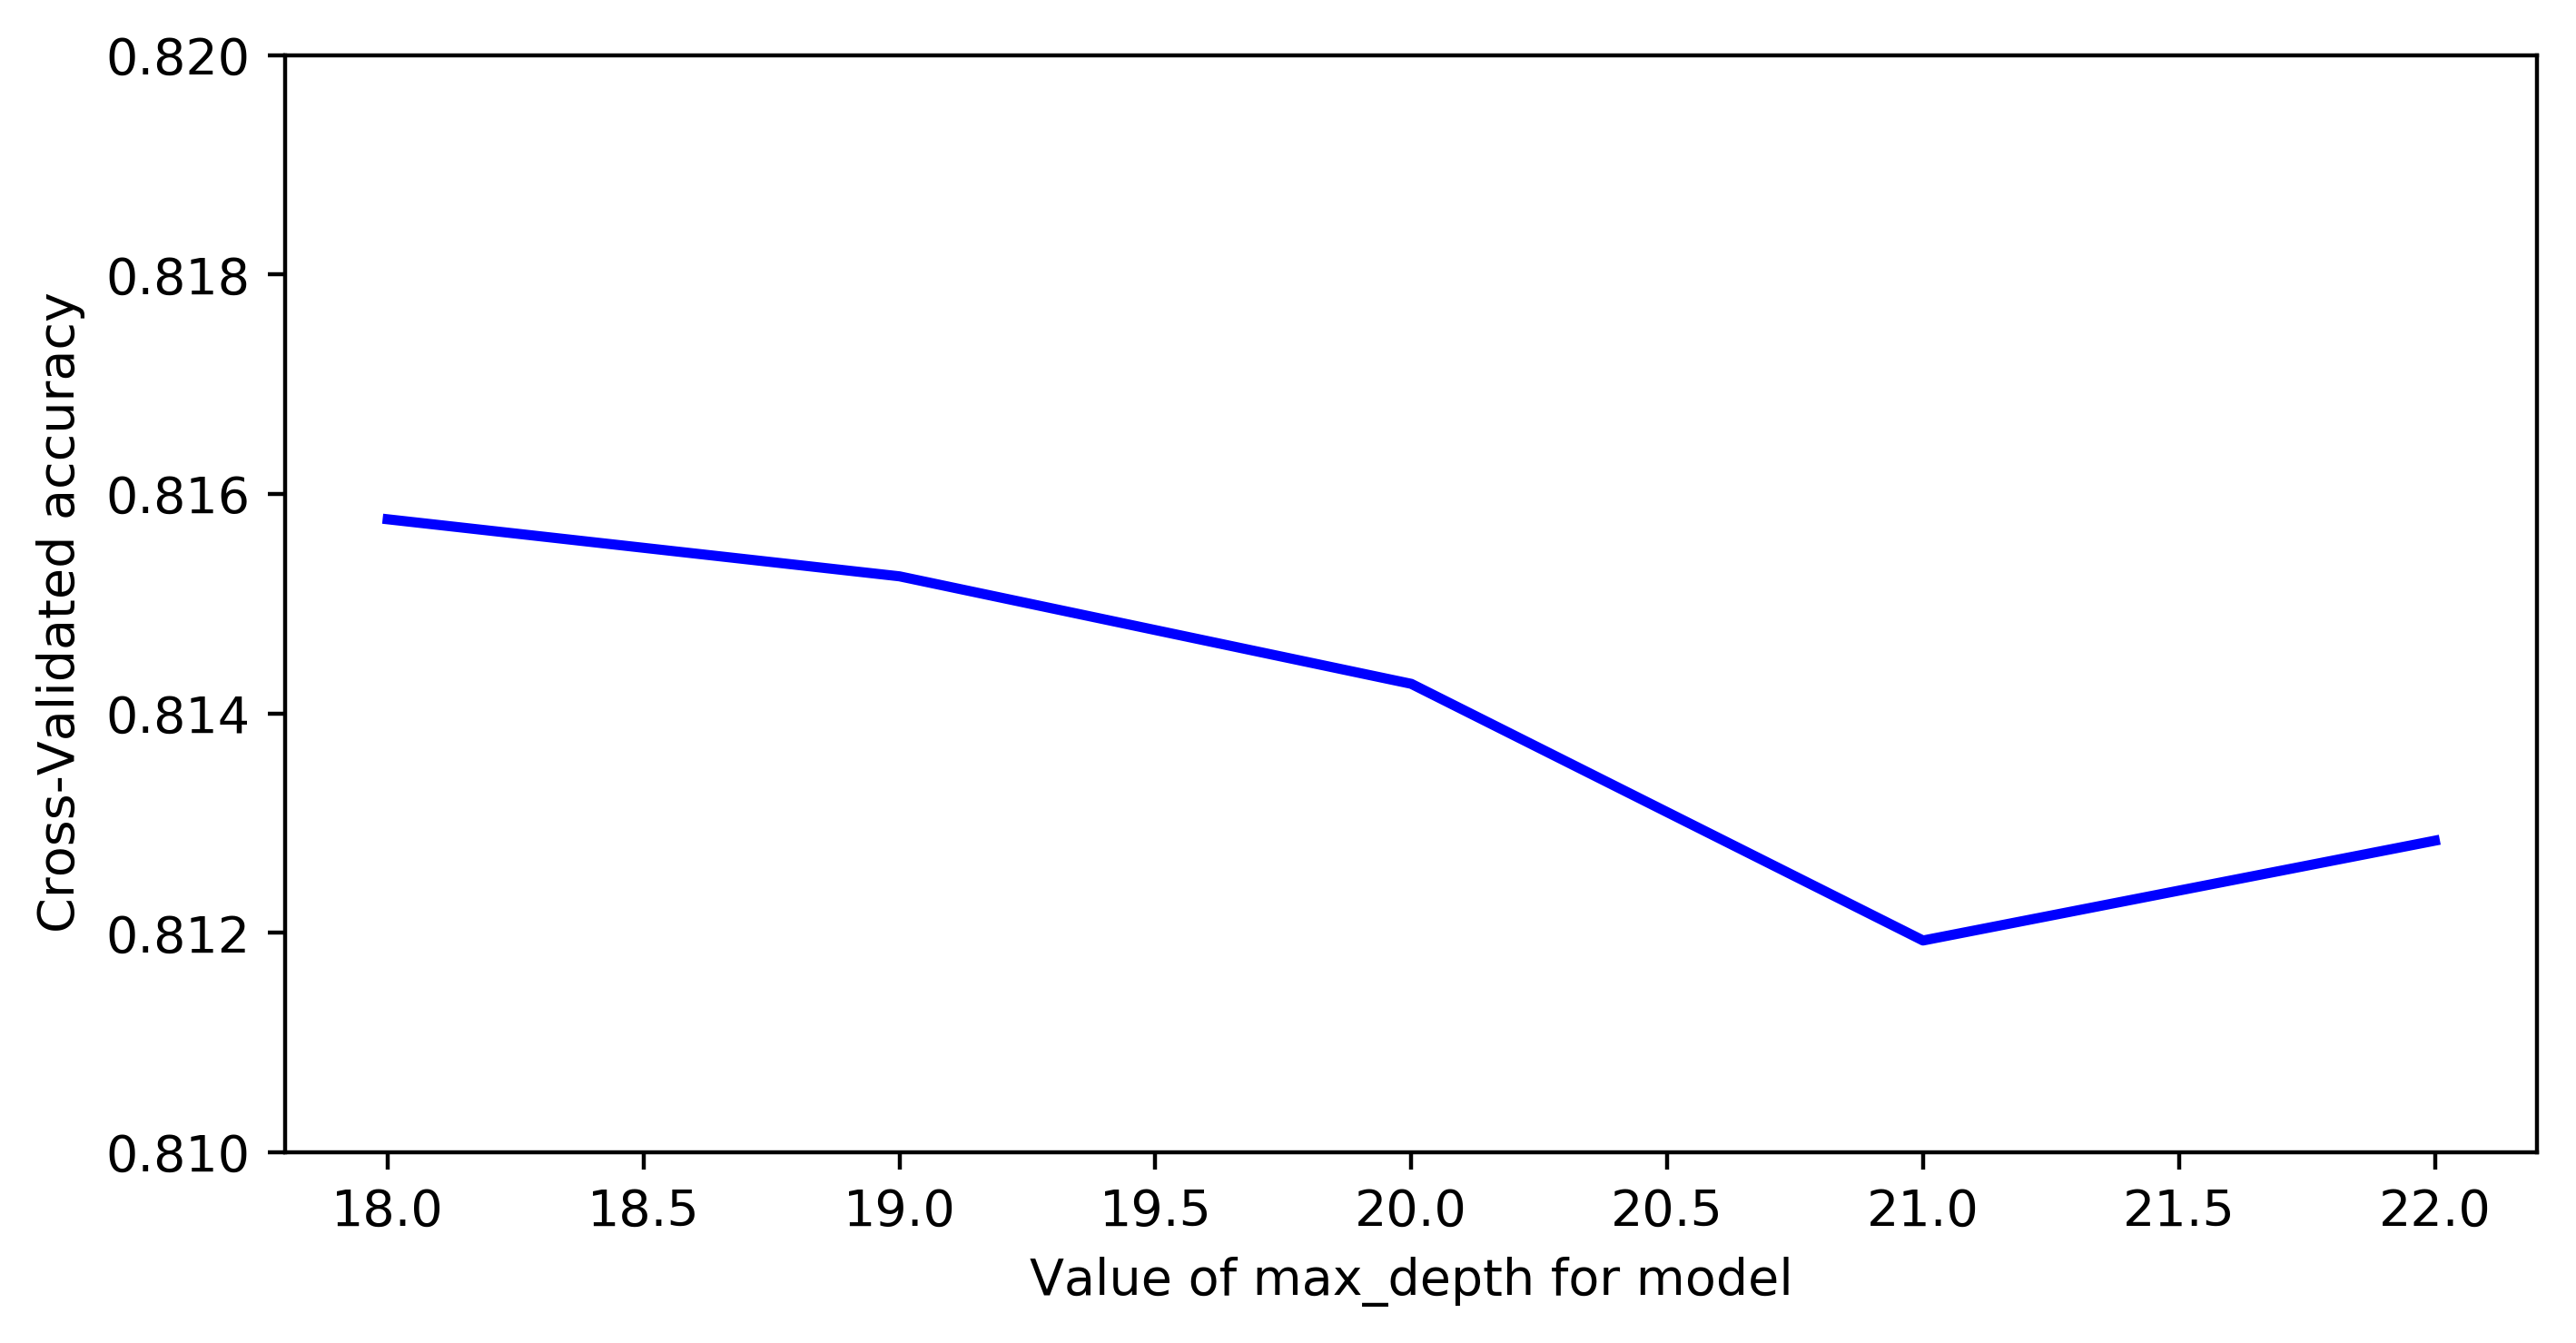

In [31]:
x =[18,19,20,21,22]
y=[0.81577,0.81525,0.81427,0.81193,0.81284]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of max_depth for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.81,0.82)
plt.show
plt.savefig('../Data/GTB_accuracy_4.png', format='png')

In [32]:
parameters = [{'learning_rate' : [0.08,0.09,0.1,0.11,0.12],'n_estimators' : [28,29,30,31,32],'min_samples_leaf':[18,19,20,21,22],'max_depth':[16,17,18,19,20]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [33]:
# grid_search = grid_search.fit(X_train, y_train)
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


674.3157228999999


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [34]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数。
best_parameters = grid_search.best_params_



In [35]:
print('%.5f' %best_accuracy)
print(best_parameters)

0.81648
{'learning_rate': 0.1, 'max_depth': 17, 'min_samples_leaf': 20, 'n_estimators': 30}


In [36]:
parameters = [{'learning_rate' :[0.08,0.09,0.1,0.11,0.12],'n_estimators' : [30],'min_samples_leaf':[20],'max_depth':[17]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [37]:
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


7.388425500000267


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [38]:
k5 = [0.08,0.09,0.1,0.11,0.12]
for x5 in k5:
    classifier= GradientBoostingClassifier(learning_rate=x5,n_estimators =30,min_samples_leaf=20,max_depth=17,random_state=0)
    classifier.fit(X_train, y_train,)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 )
   

    print('%.5f' % accuracies.mean())


0.80997
0.81331
0.81670
0.80902
0.81137


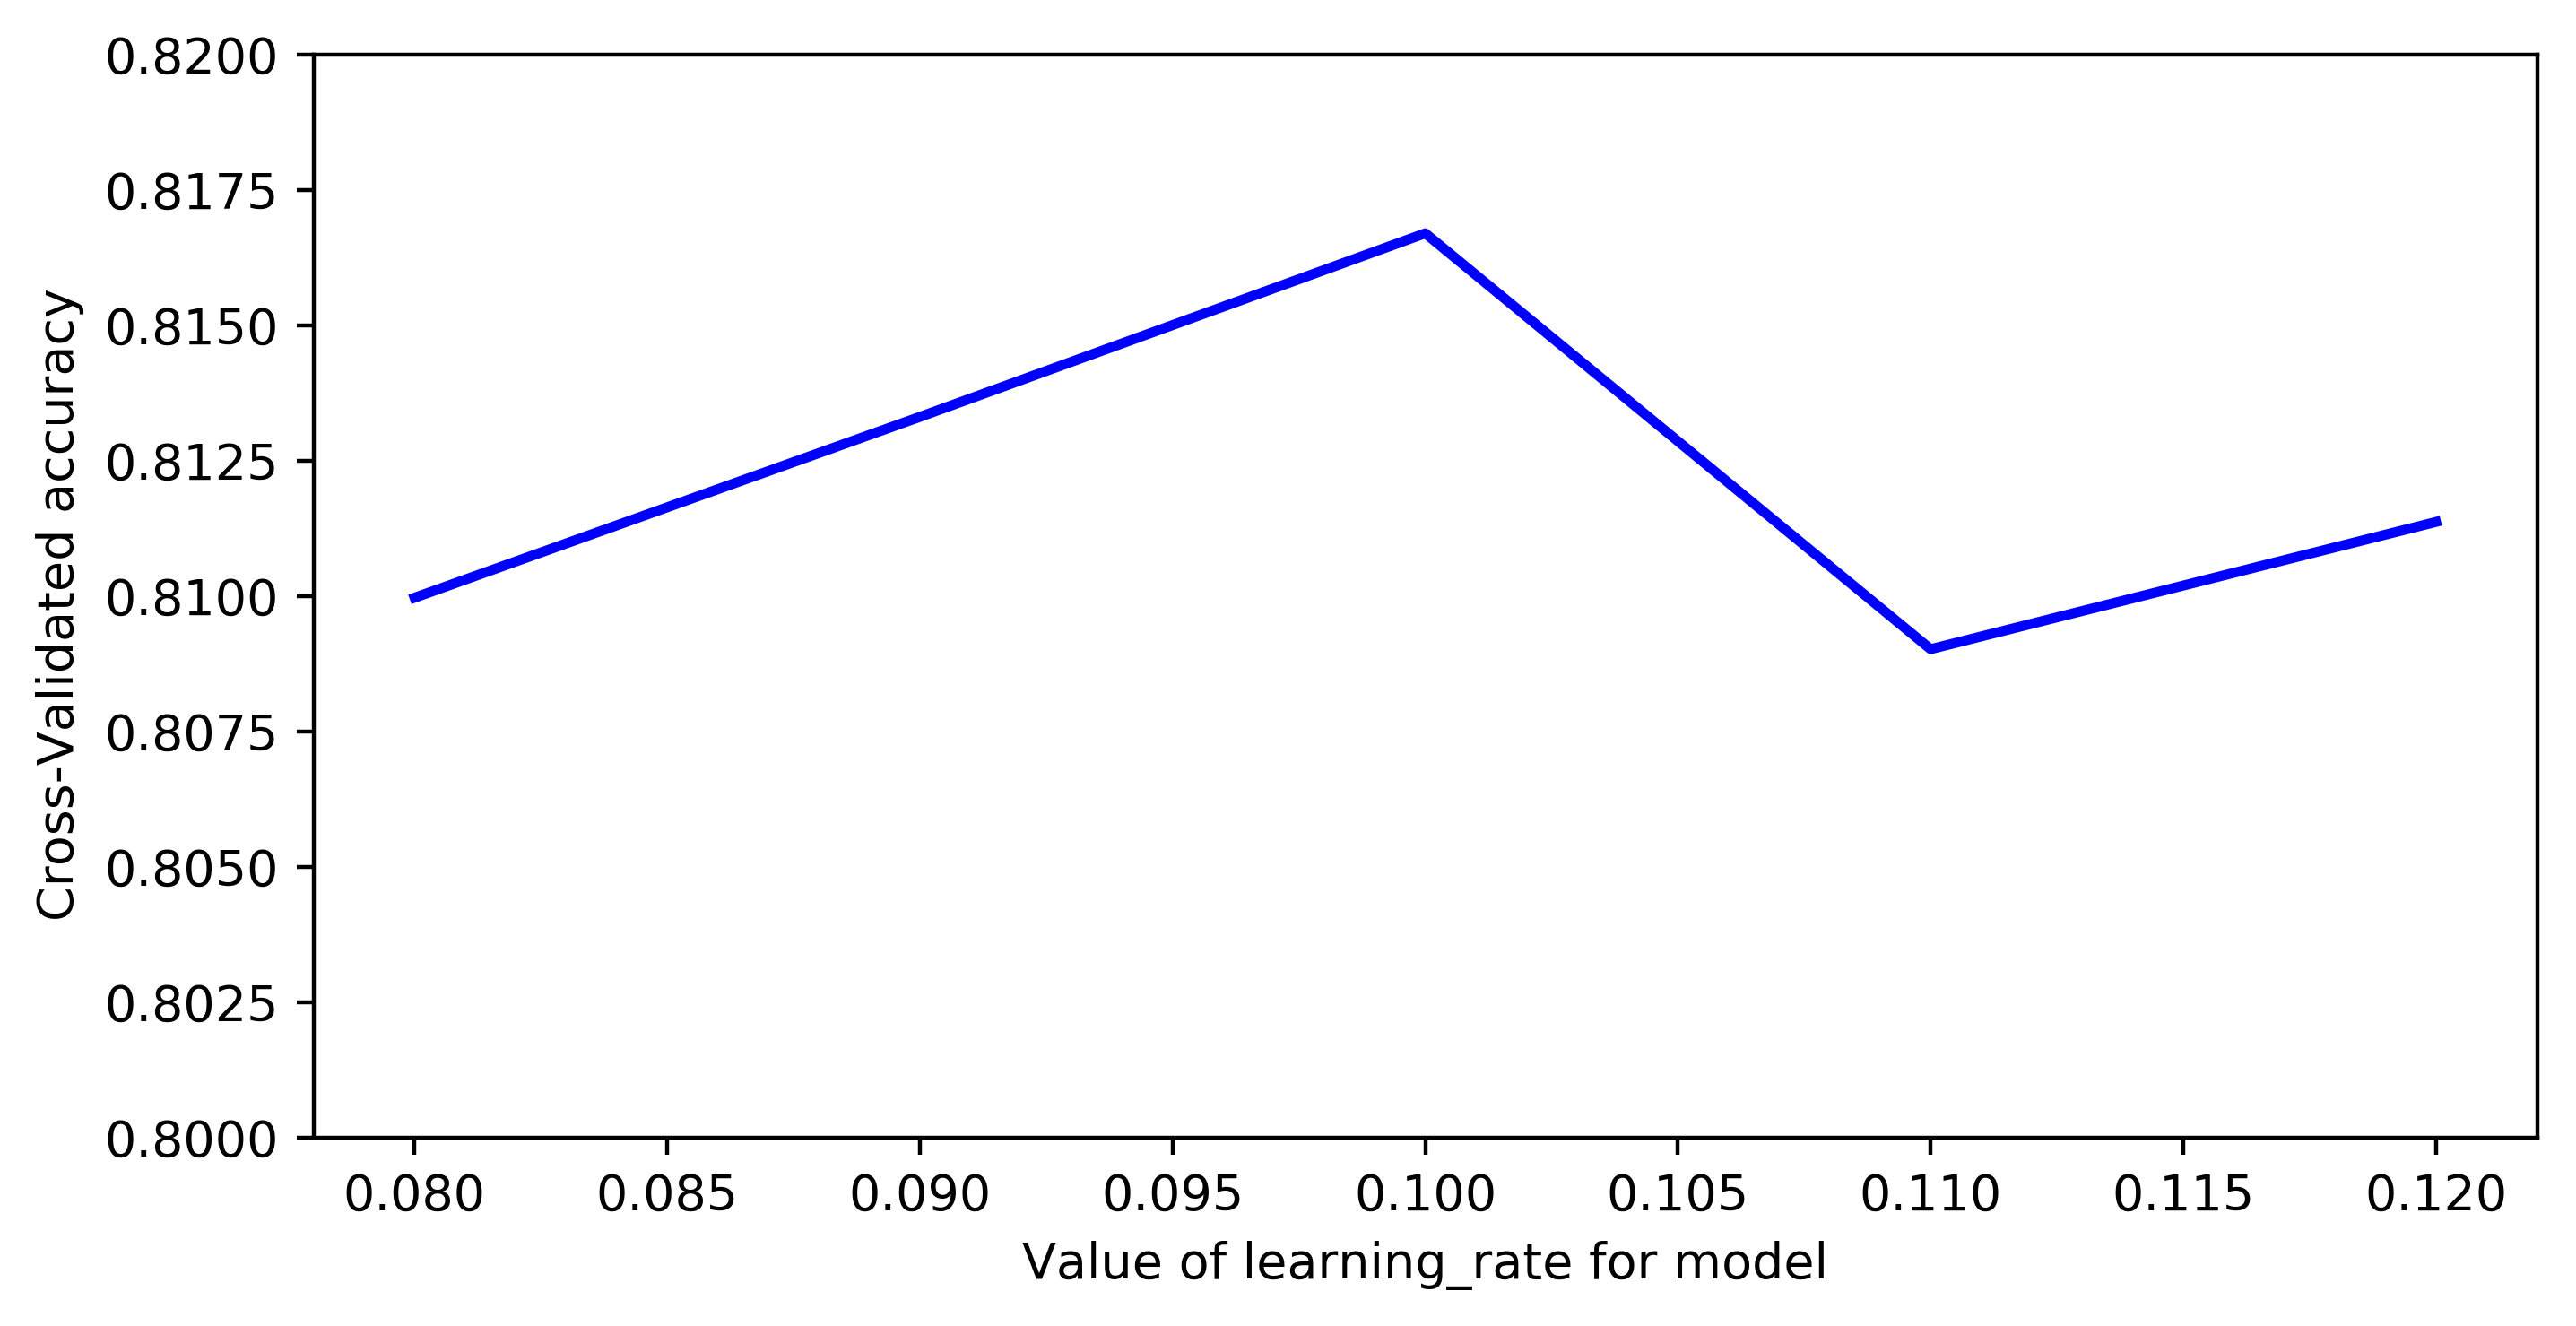

In [39]:
x =  [0.08,0.09,0.1,0.11,0.12]
y=[0.80997,0.81331,0.81670,0.80902,0.81137]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of learning_rate for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.80,0.82)
plt.show
plt.savefig('../Data/GTB_accuracy_5.png', format='png')

In [40]:
parameters = [{'learning_rate' :[0.1],'n_estimators' : [28,29,30,31,32],'min_samples_leaf':[20],'max_depth':[17]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [41]:
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


7.435559800000192


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [42]:
k6 = [28,29,30,31,32]
for x6 in k6:
    classifier= GradientBoostingClassifier(learning_rate=0.1,n_estimators =x6,min_samples_leaf=20,max_depth=17,random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.81143
0.81192
0.81670
0.81380
0.81427


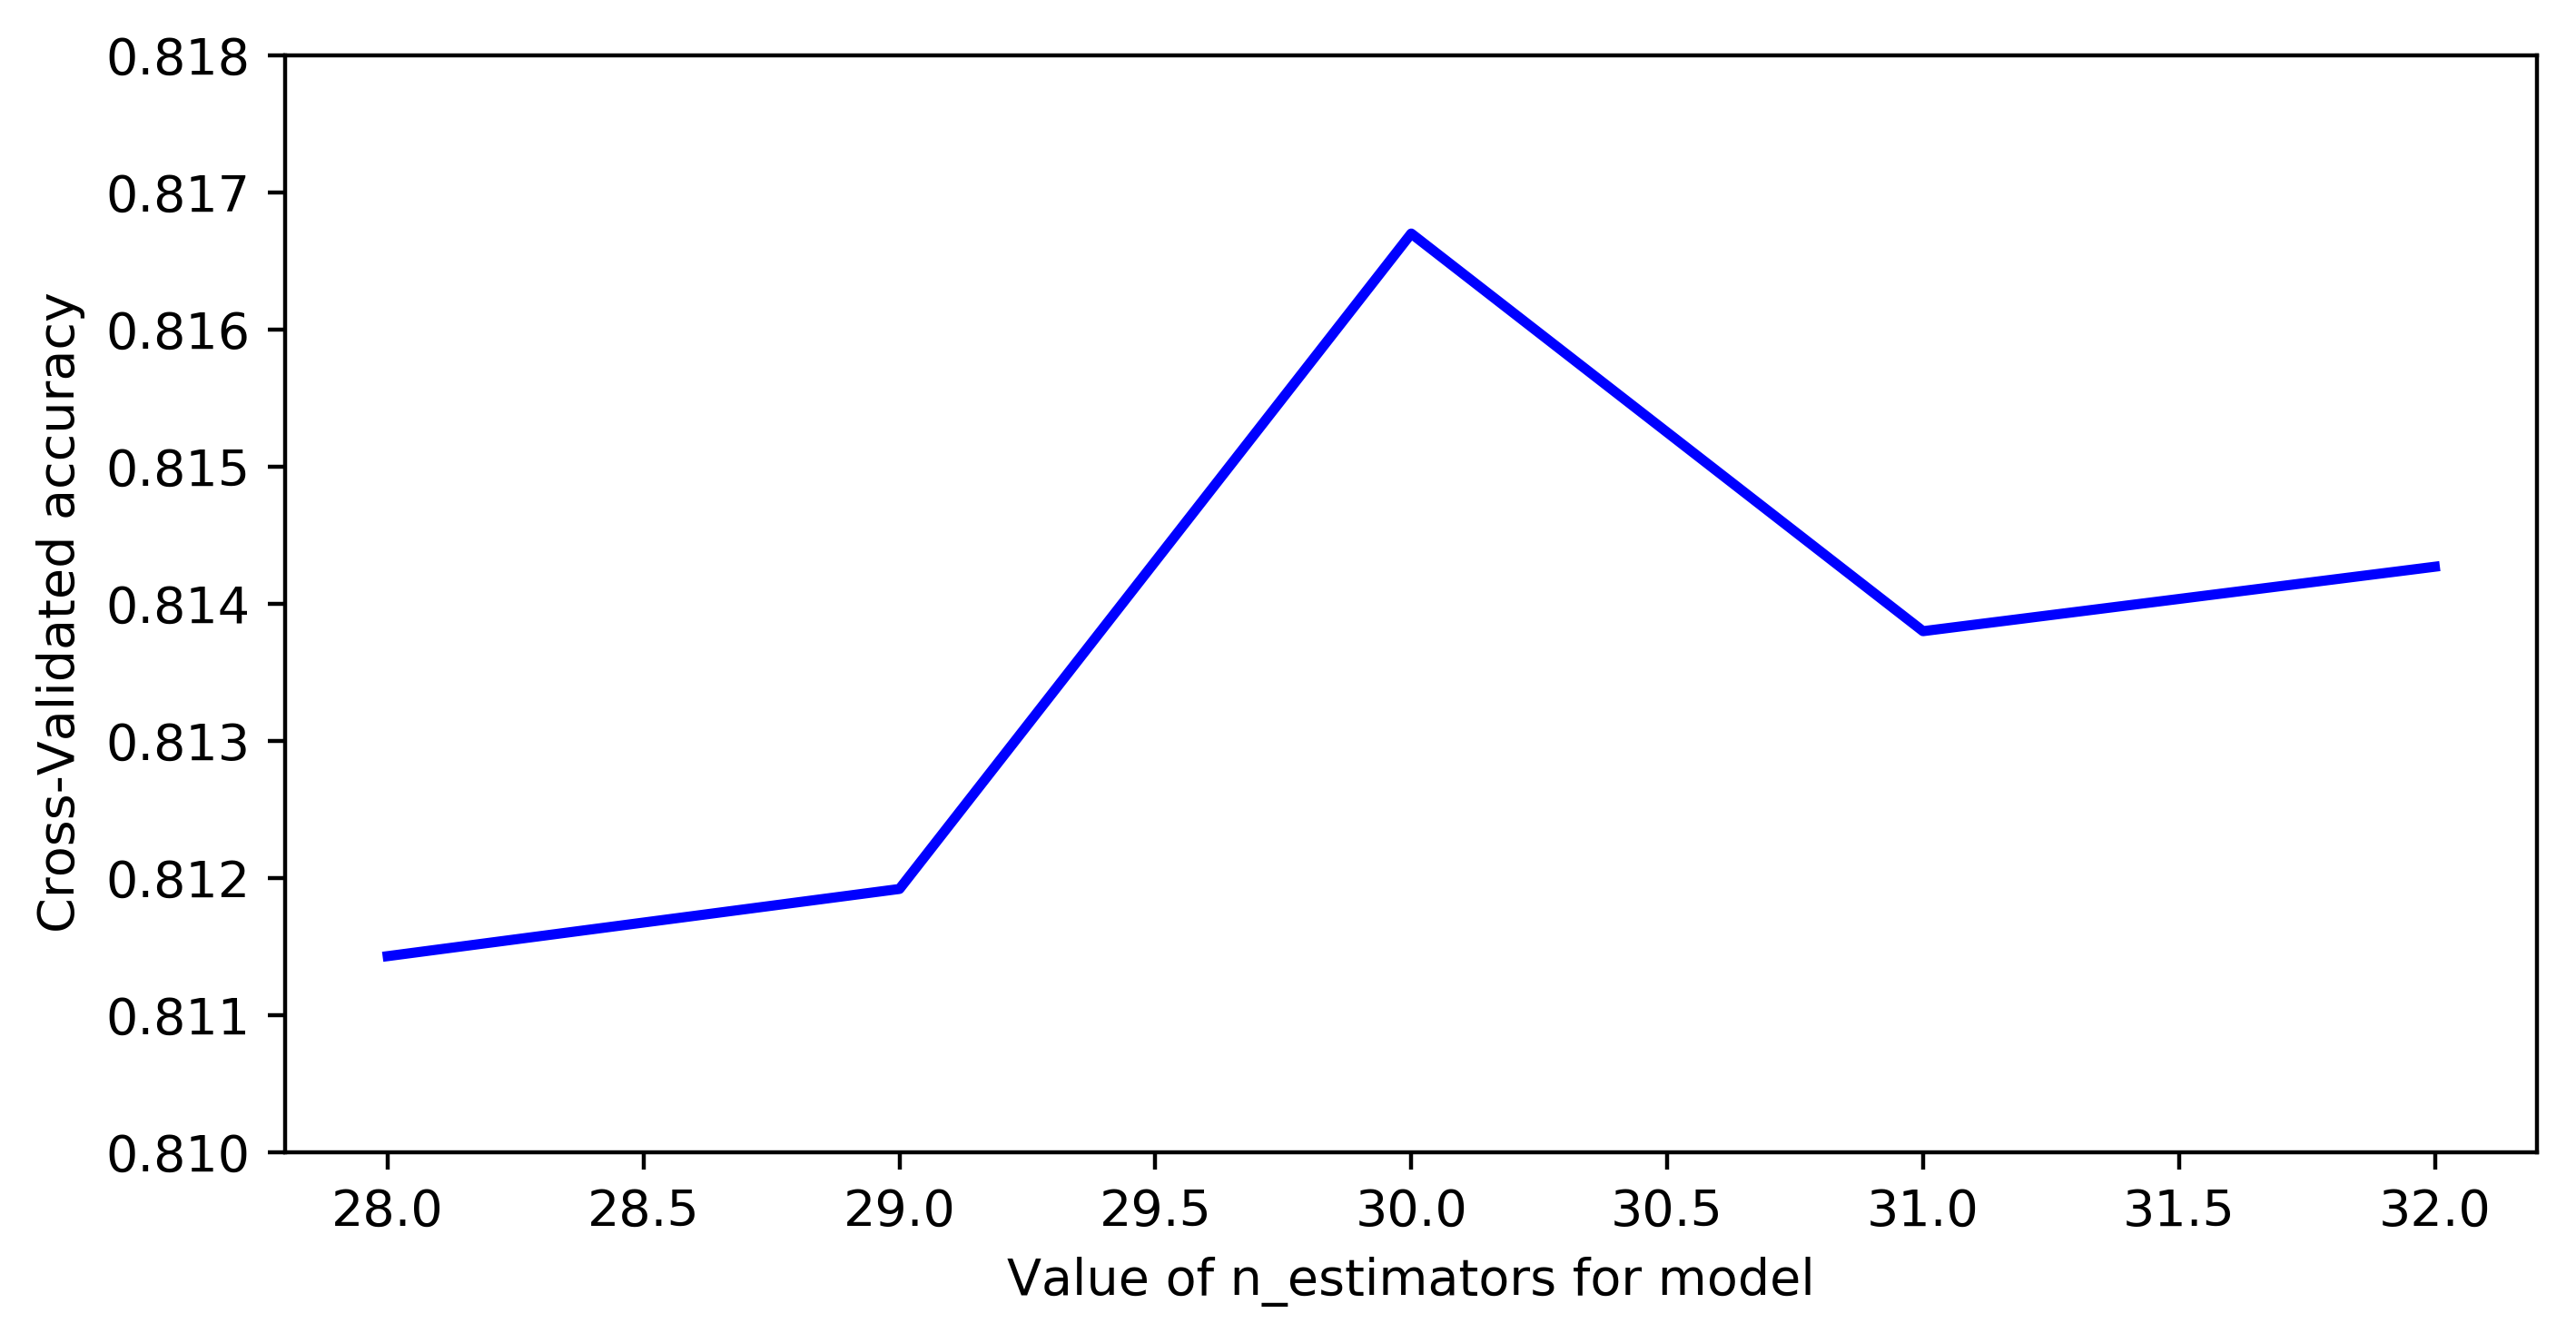

In [43]:
x = [28,29,30,31,32]
y=[0.81143,0.81192,0.81670,0.81380,0.81427]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of n_estimators for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.81,0.818)
plt.show
plt.savefig('../Data/GTB_accuracy_6.png', format='png')

In [44]:
parameters = [{'learning_rate' : [0.1],'n_estimators' : [30],'min_samples_leaf':[18,19,20,21,22],'max_depth':[17]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [45]:
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


7.447868199999903


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [46]:
k7 = [18,19,20,21,22]
for x7 in k7:
    classifier= GradientBoostingClassifier(learning_rate=0.1,n_estimators =30,min_samples_leaf=x7,max_depth=17,random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.80948
0.81232
0.81670
0.80947
0.80953


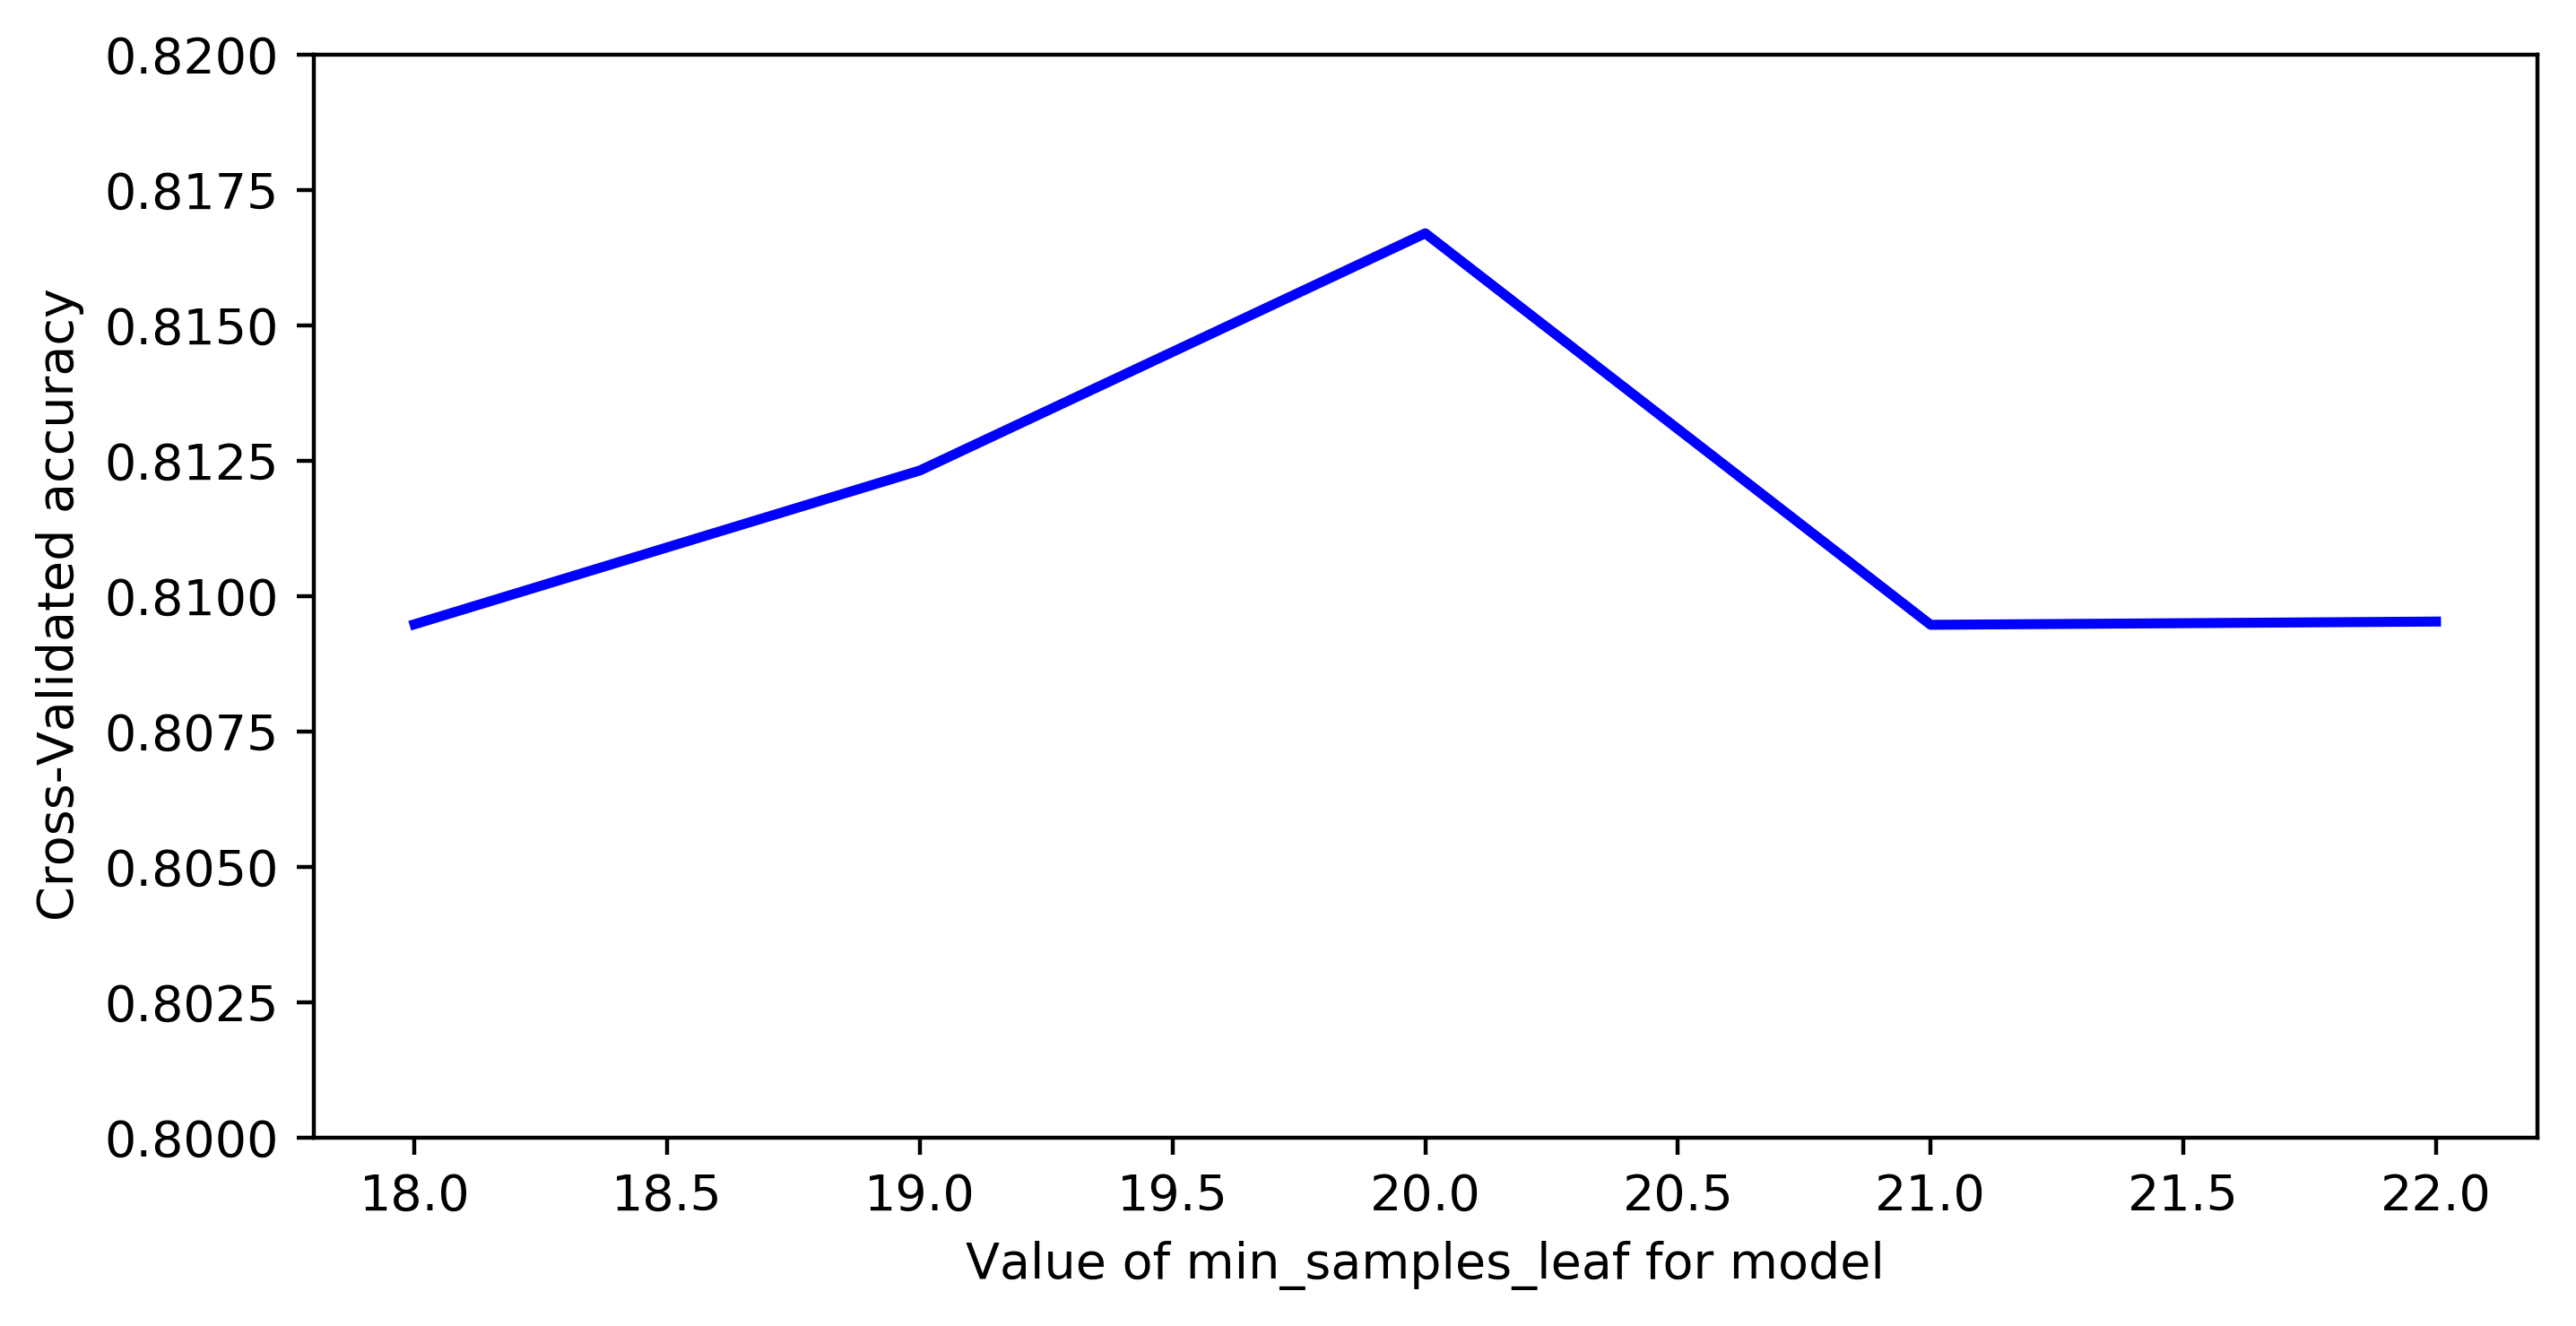

In [47]:
x =[18,19,20,21,22]
y=[0.80948,0.81232,0.81670,0.80947,0.80953]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of min_samples_leaf for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.80,0.82)
plt.show
plt.savefig('../Data/GTB_accuracy_7.png', format='png')

In [48]:
parameters = [{'learning_rate' : [0.1],'n_estimators' : [30],'min_samples_leaf':[20],'max_depth':[16,17,18,19,20]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [49]:
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


7.511385599999812


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [50]:
k8 = [16,17,18,19,20]
for x8 in k8:
    classifier= GradientBoostingClassifier(learning_rate=0.1,n_estimators =30,min_samples_leaf=20,max_depth=x8,random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.81287
0.81670
0.81577
0.81525
0.81427


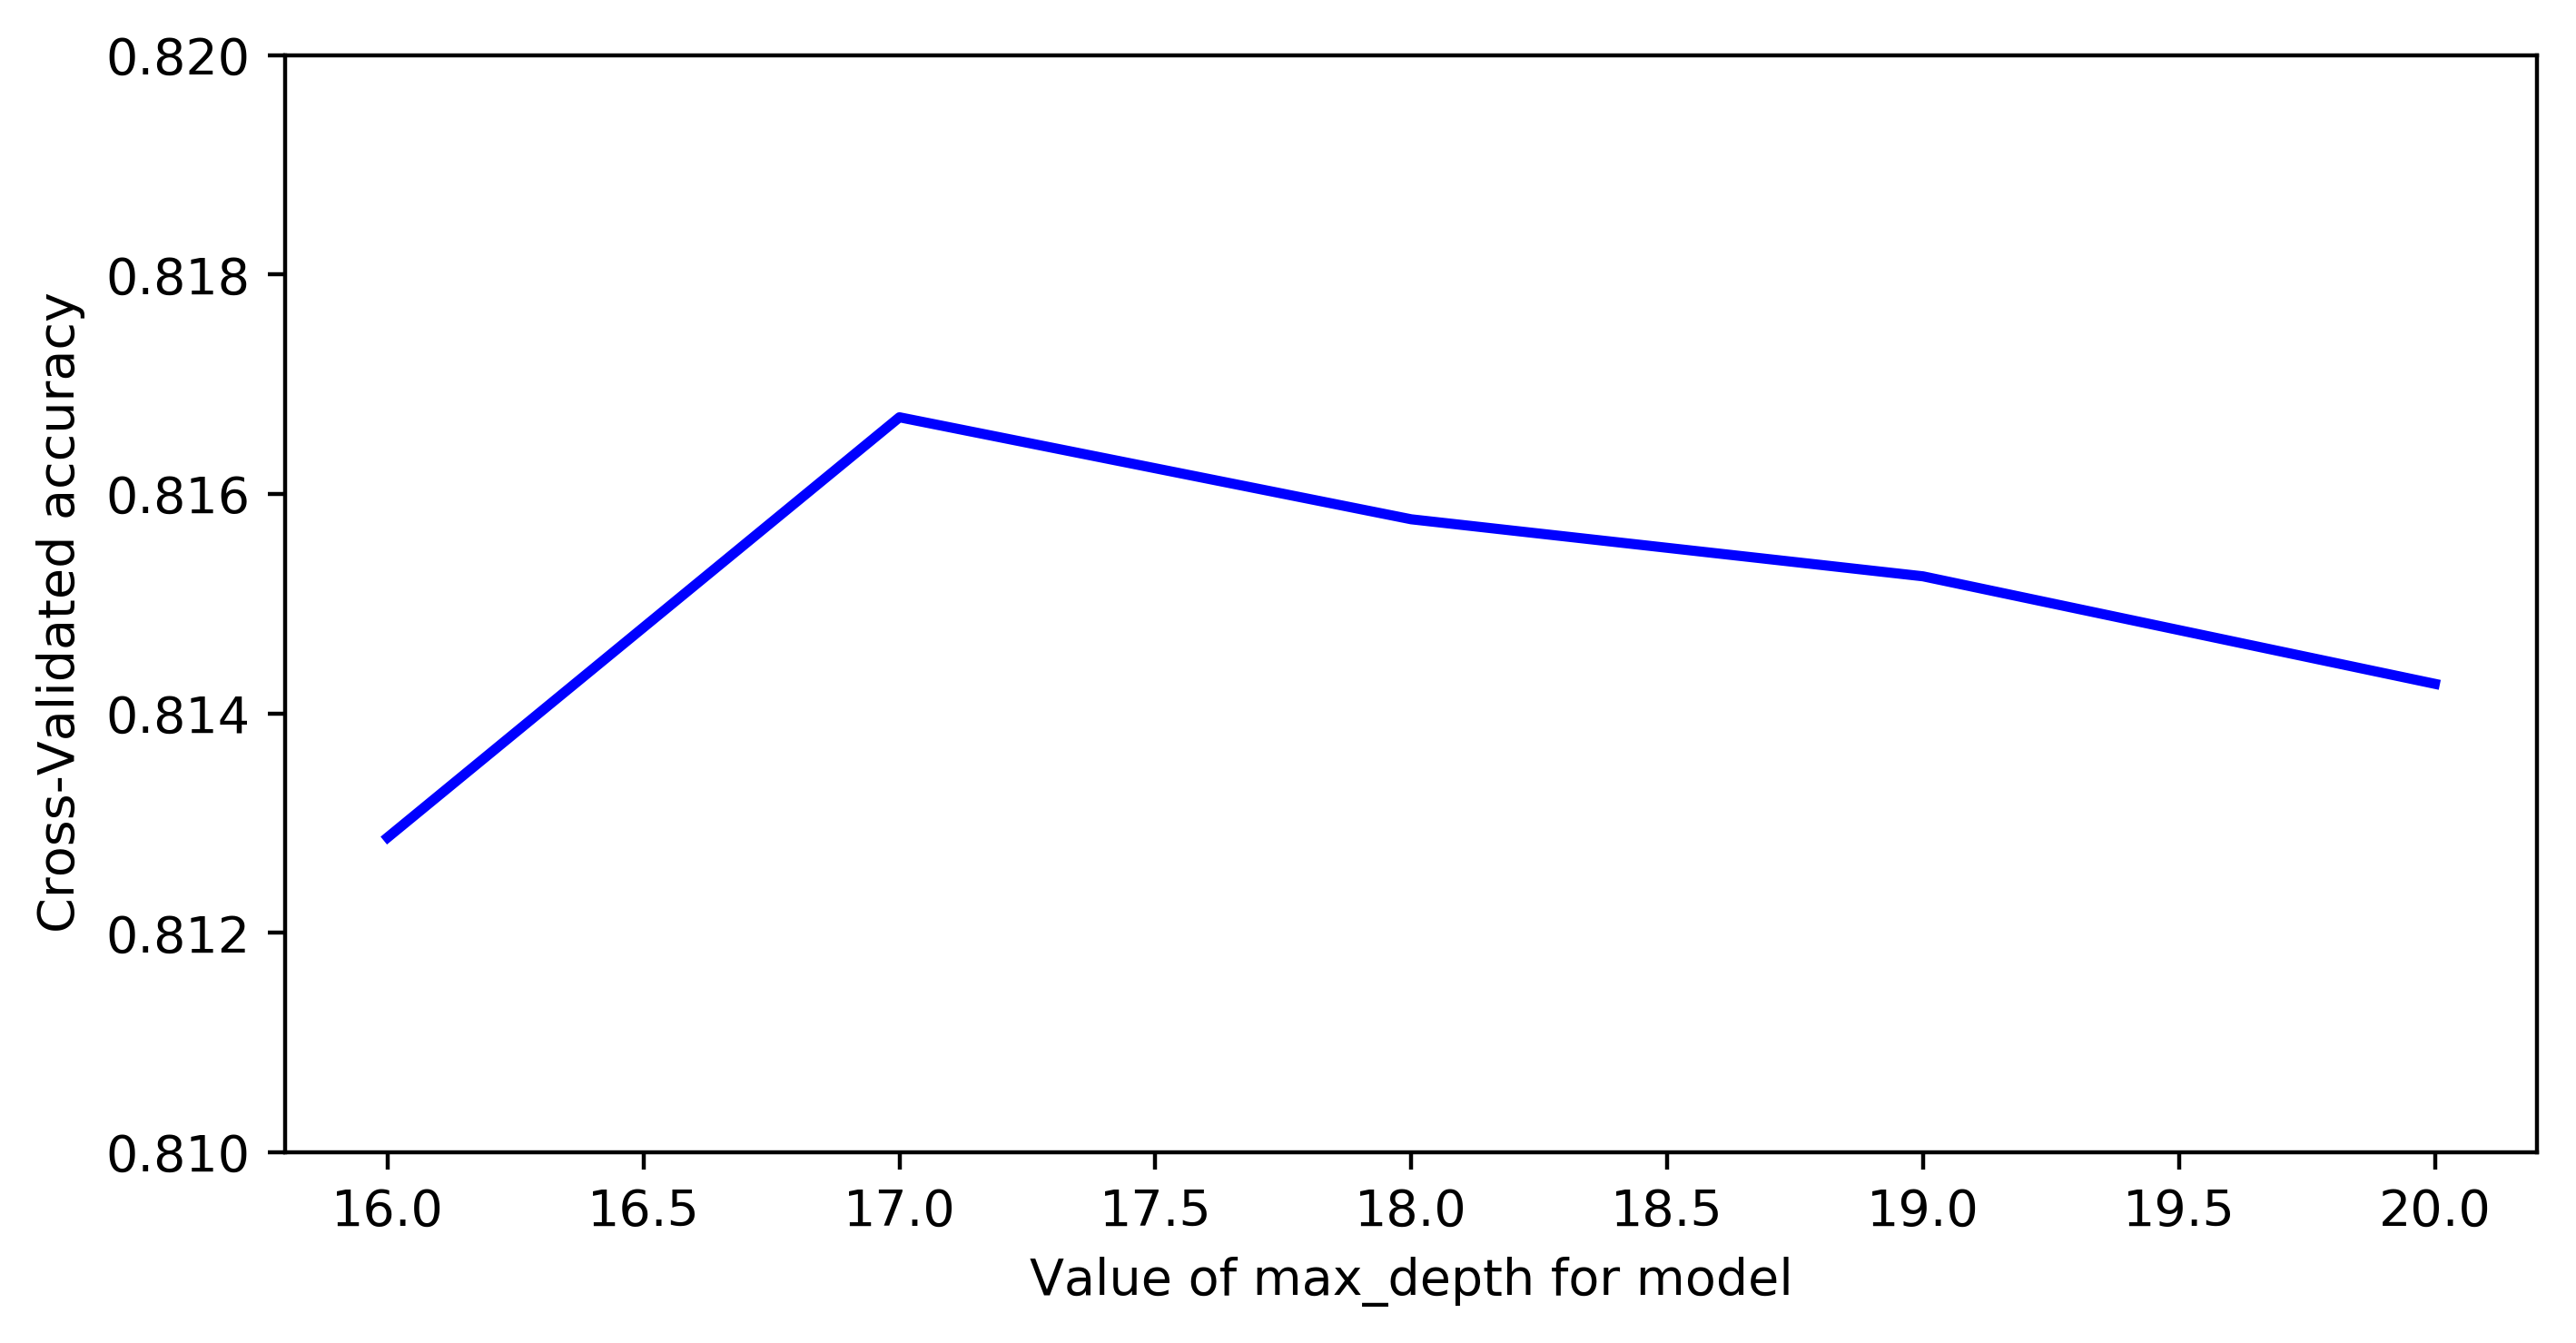

In [51]:
x =[16,17,18,19,20]
y=[0.81287,0.81670,0.81577,0.81525,0.81427]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of max_depth for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.81,0.82)
plt.show
plt.savefig('../Data/GTB_accuracy_8.png', format='png')

In [3]:

from sklearn.model_selection import cross_val_score
classifier= GradientBoostingClassifier(learning_rate=0.1, max_depth=17, min_samples_leaf=20,n_estimators=30,random_state=0)

classifier.fit(X_train, y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train ,cv=10)
# print('训练集精度为：')

# print('%.5f' %accuracies.mean())




In [4]:
print("正在保存训练数据结果至文件中...")
y_train_pred= classifier.predict(X_train)
y_train_pred = pd.DataFrame({'GTB_train_pred': y_train_pred})
Df = pd.concat([df, y_train_pred ], axis=1)
writer = pd.ExcelWriter('../data/train6041.xlsx', engine='xlsxwriter')

Df.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()
print("处理完毕，已保存至文件！")
input("Please press <enter>")

print('训练集精度为：')

accuracy_score(y_train,y_train_pred)


正在保存训练数据结果至文件中...
处理完毕，已保存至文件！
Please press <enter>
训练集精度为：


0.9415428845232391

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred,digits=5))

              precision    recall  f1-score   support

           1    1.00000   1.00000   1.00000        67
           2    0.96396   0.76429   0.85259       140
           3    0.94731   0.98923   0.96782       836
           4    0.95516   0.93421   0.94457       456
           5    0.89474   0.70833   0.79070        24
           6    0.90761   0.94350   0.92521       177
           7    0.94340   0.92593   0.93458       108
           8    0.90435   0.87395   0.88889       119
           9    0.93939   1.00000   0.96875        62
          10    0.88000   0.89796   0.88889        98

    accuracy                        0.94154      2087
   macro avg    0.93359   0.90374   0.91620      2087
weighted avg    0.94181   0.94154   0.94049      2087



In [6]:
print("开始读入测试数据...")
testDf = pd.read_excel('../data/test6041.xlsx', sheet_name='Sheet1')


# ttc = csc.transform(testDf[' temperature logging'].values.reshape(-1, 1))
# ttd = dsc.transform(testDf['Vertical Component Logging '].values.reshape(-1, 1))
tte = esc.transform(testDf['Fluid resistivity logging'].values.reshape(-1, 1))
ttf = fsc.transform(testDf['natural gamma-ray logging'].values.reshape(-1, 1))
ttg = gsc.transform(testDf['spontaneous potential logging'].values.reshape(-1, 1))


X_test = np.concatenate((tte,ttf,ttg), axis=1)

y_test = np.array(testDf['rock'])

开始读入测试数据...


In [7]:
classifier.fit(X_test, y_test)
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test,cv=10)
# print('测试集精度为：')

# print('%.5f' %accuracies.mean())

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [8]:
# y_test_pred = classifier.predict(X_test)
y_test_pred= classifier.predict(X_test)
print("正在保存测试结果至文件中...")
y_test_pred = pd.DataFrame({'GTB_test_pred':y_test_pred })
wDf = pd.concat([testDf, y_test_pred ], axis=1)
writer = pd.ExcelWriter('../data/test6041.xlsx', engine='xlsxwriter')

wDf.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()
print("处理完毕，已保存至文件！")
input("Please press <enter>")
print('测试集精度为：')

accuracy_score(y_test,y_test_pred)

正在保存测试结果至文件中...
处理完毕，已保存至文件！
Please press <enter>
测试集精度为：


0.9348659003831418

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred,digits=5))



              precision    recall  f1-score   support

           1    1.00000   0.93750   0.96774        16
           2    0.95652   0.66667   0.78571        33
           3    0.92411   0.99043   0.95612       209
           4    0.94737   0.94737   0.94737       114
           5    0.66667   0.66667   0.66667         3
           6    0.95000   0.95000   0.95000        40
           7    0.90000   0.84375   0.87097        32
           8    0.92308   0.80000   0.85714        30
           9    1.00000   1.00000   1.00000        18
          10    0.93103   1.00000   0.96429        27

    accuracy                        0.93487       522
   macro avg    0.91988   0.88024   0.89660       522
weighted avg    0.93551   0.93487   0.93269       522



[[0.938 0.062 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.667 0.303 0.    0.03  0.    0.    0.    0.    0.   ]
 [0.    0.    0.99  0.    0.    0.    0.01  0.    0.    0.   ]
 [0.    0.    0.026 0.947 0.    0.    0.009 0.018 0.    0.   ]
 [0.    0.    0.333 0.    0.667 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.025 0.    0.95  0.    0.    0.    0.025]
 [0.    0.    0.094 0.    0.    0.031 0.844 0.    0.    0.031]
 [0.    0.    0.    0.167 0.    0.033 0.    0.8   0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]]


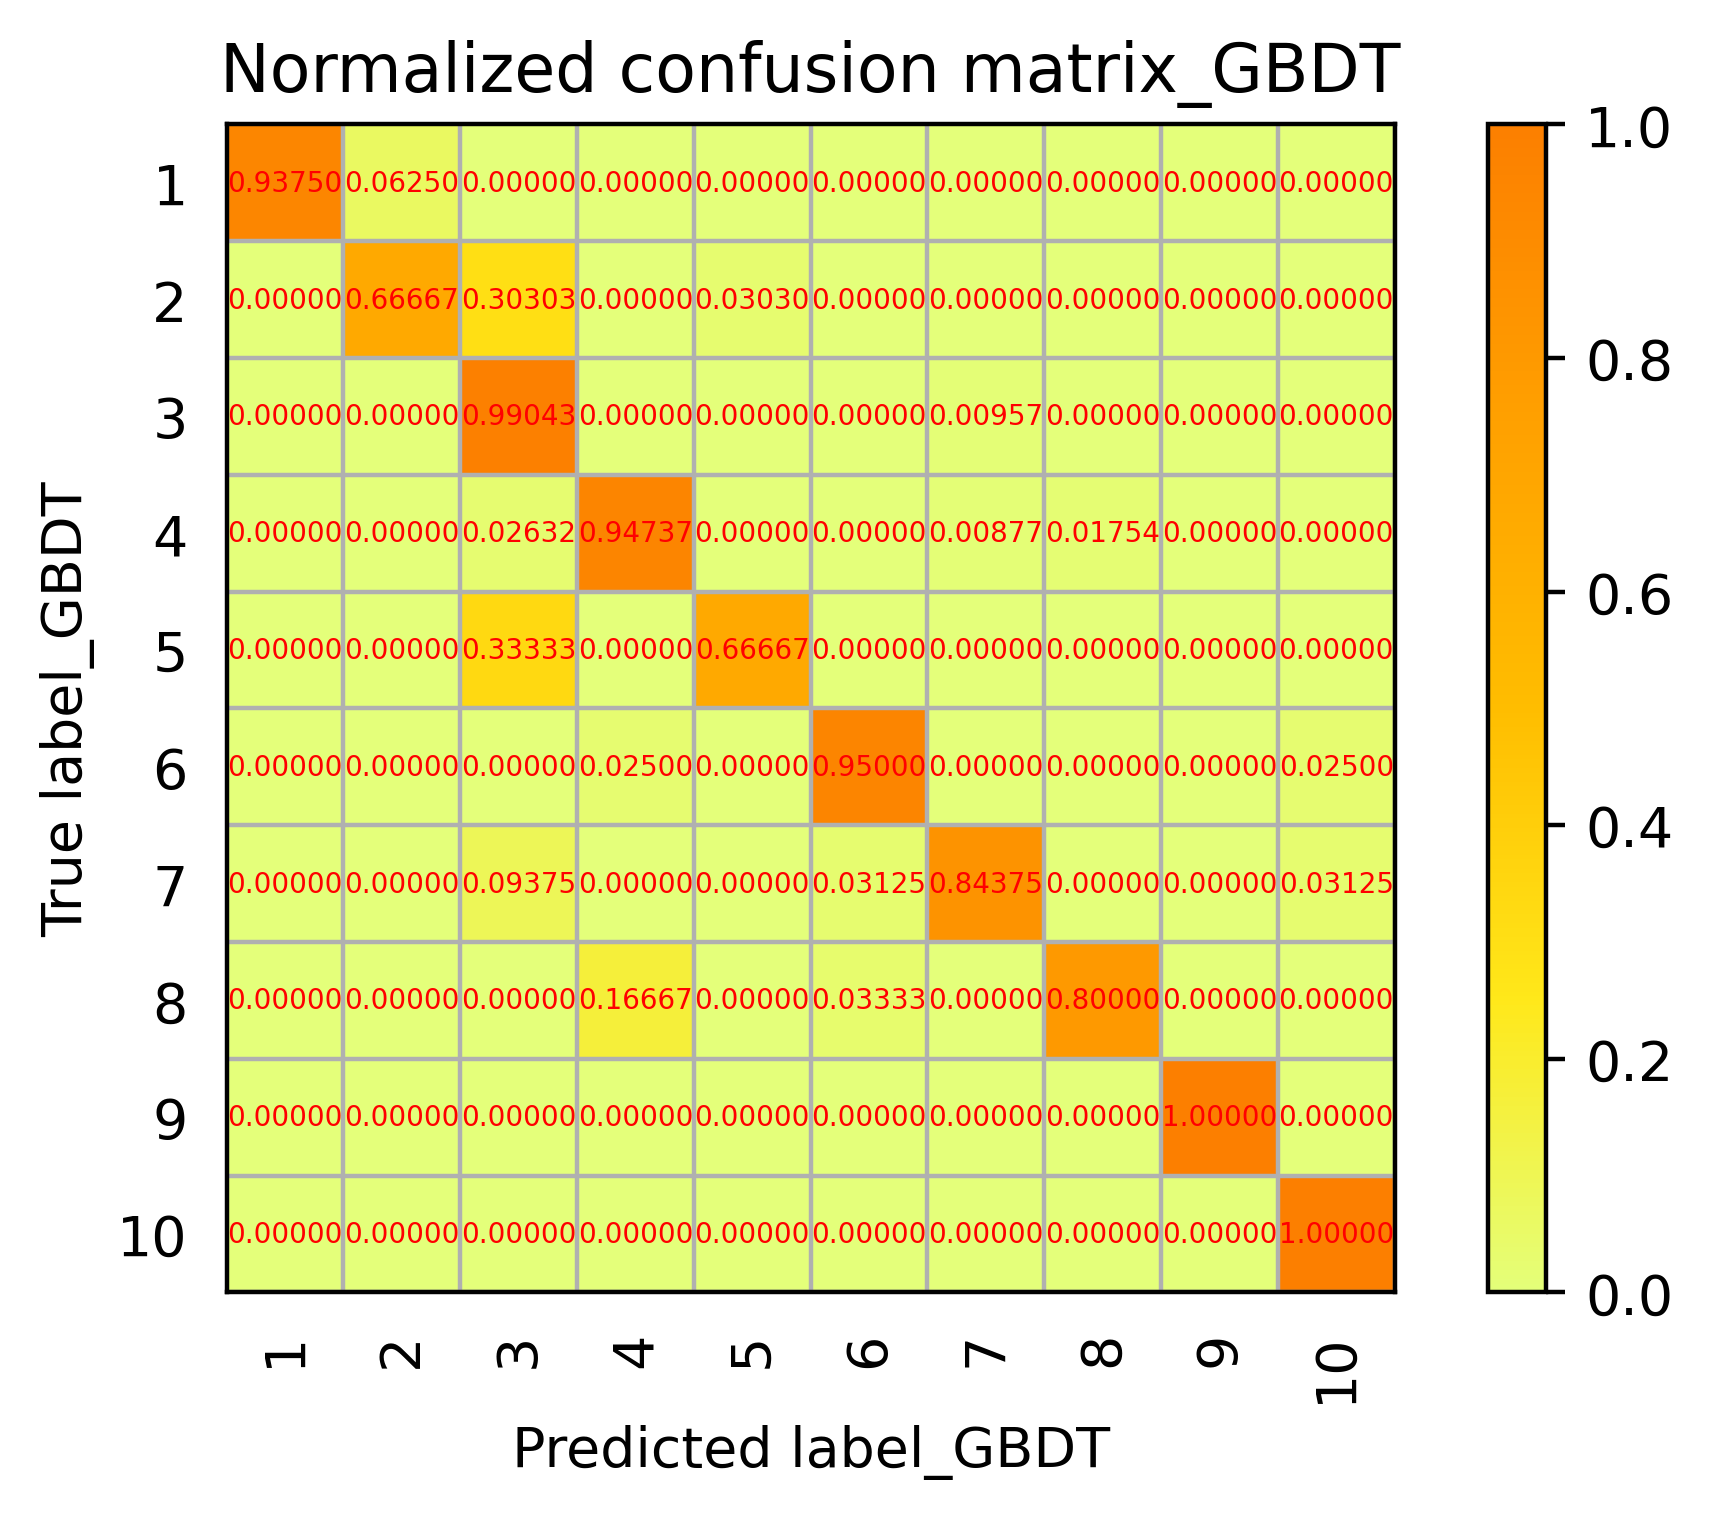

In [11]:


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
labels = ['1', '2', '3','4','5','6','7','8','9','10']
tick_marks = np.array(range(len(labels))) + 0.5
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label_GBDT')
    plt.xlabel('Predicted label_GBDT')
cm = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=3)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)
plt.figure(figsize=(6, 4), dpi=400)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c >= 0.0:
        plt.text(x_val, y_val, "%0.5f" % (c,), color='red', fontsize=5, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix_GBDT')
# show confusion matrix
plt.savefig('../Data/confusion_matrix_GBDT.png', format='png')
plt.show()